In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import citipy
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
cities

['dumas',
 'punta arenas',
 'kodiak',
 'vardo',
 'broome',
 'taolanaro',
 'san luis',
 'iznoski',
 'faanui',
 'xinzhi',
 'hermanus',
 'pisco',
 'avarua',
 'airai',
 'rikitea',
 'timoteo',
 'jamestown',
 'san quintin',
 'narsaq',
 'porto nacional',
 'busselton',
 'ushuaia',
 'kasempa',
 'codrington',
 'de aar',
 'fortuna',
 'porto novo',
 'cururupu',
 'barrow',
 'kavaratti',
 'belushya guba',
 'tumannyy',
 'jipijapa',
 'albany',
 'tawau',
 'wani',
 'yian',
 'port alfred',
 'tsihombe',
 'harper',
 'sitka',
 'cacu',
 'guerrero negro',
 'caravelas',
 'severo-kurilsk',
 'coahuayana',
 'puerto ayora',
 'dingle',
 'tubruq',
 'nemuro',
 'provideniya',
 'khatanga',
 'saint george',
 'bethel',
 'shenzhen',
 'kirakira',
 'bur gabo',
 'lismore',
 'okha',
 'maragogi',
 'hilo',
 'atuona',
 'honiara',
 'salalah',
 'george',
 'mataura',
 'vaini',
 'kurchum',
 'termiz',
 'srednekolymsk',
 'santa isabel do rio negro',
 'attawapiskat',
 'cape town',
 'new norfolk',
 'marcona',
 'nikolskoye',
 'abu jubayh

In [6]:
# Import the dependencies.
import requests
from config import weather_api_key


In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        print(city_weather)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dumas
{'coord': {'lon': -101.9732, 'lat': 35.8656}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.94, 'feels_like': 58.3, 'temp_min': 60.94, 'temp_max': 60.94, 'pressure': 1016, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1648406166, 'sys': {'type': 1, 'id': 3874, 'country': 'US', 'sunrise': 1648384874, 'sunset': 1648429500}, 'timezone': -18000, 'id': 5520552, 'name': 'Dumas', 'cod': 200}
Processing Record 2 of Set 1 | punta arenas
{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.11, 'feels_like': 47.5, 'temp_min': 50.11, 'temp_max': 50.11, 'pressure': 985, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 27.63, 'deg': 300}, 'clouds':

{'coord': {'lon': -42.6444, 'lat': -19.5825}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 90.46, 'feels_like': 97.47, 'temp_min': 90.46, 'temp_max': 90.46, 'pressure': 1011, 'humidity': 54, 'sea_level': 1011, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 5.91, 'deg': 61, 'gust': 5.59}, 'clouds': {'all': 16}, 'dt': 1648406176, 'sys': {'type': 1, 'id': 8370, 'country': 'BR', 'sunrise': 1648371363, 'sunset': 1648414539}, 'timezone': -10800, 'id': 3446445, 'name': 'Timóteo', 'cod': 200}
Processing Record 17 of Set 1 | jamestown
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.63, 'feels_like': 9.03, 'temp_min': 20.84, 'temp_max': 24.39, 'pressure': 1010, 'humidity': 64}, 'visibility': 805, 'wind': {'speed': 25.32, 'deg': 300, 'gust': 34.52}, 'clouds': {'all': 100}, 'dt': 

{'coord': {'lon': 72.642, 'lat': 10.5669}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.98, 'feels_like': 88.61, 'temp_min': 82.98, 'temp_max': 82.98, 'pressure': 1011, 'humidity': 71, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.07, 'deg': 349, 'gust': 7.05}, 'clouds': {'all': 0}, 'dt': 1648406184, 'sys': {'country': 'IN', 'sunrise': 1648429737, 'sunset': 1648473602}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
Processing Record 31 of Set 1 | belushya guba
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 32 of Set 1 | tumannyy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 33 of Set 1 | jipijapa
{'coord': {'lon': -80.5833, 'lat': -1.3333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.1

{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.16, 'feels_like': 92.55, 'temp_min': 84.16, 'temp_max': 84.16, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 12.37, 'deg': 134, 'gust': 12.03}, 'rain': {'1h': 0.23}, 'clouds': {'all': 88}, 'dt': 1648406194, 'sys': {'type': 1, 'id': 8521, 'country': 'EC', 'sunrise': 1648382607, 'sunset': 1648426189}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
Processing Record 48 of Set 1 | dingle
{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.81, 'feels_like': 77.38, 'temp_min': 75.81, 'temp_max': 75.81, 'pressure': 1009, 'humidity': 91, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed':

{'coord': {'lon': 159.95, 'lat': -9.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.77, 'feels_like': 78.28, 'temp_min': 76.77, 'temp_max': 76.77, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 195, 'gust': 3.38}, 'clouds': {'all': 100}, 'dt': 1648406262, 'sys': {'country': 'SB', 'sunrise': 1648409029, 'sunset': 1648452411}, 'timezone': 39600, 'id': 2108502, 'name': 'Honiara', 'cod': 200}
Processing Record 14 of Set 2 | salalah
{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.49, 'feels_like': 83.48, 'temp_min': 82.49, 'temp_max': 82.49, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 1.14, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1648406263, 'sys': {'type': 1, 'id': 7562, '

{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.37, 'feels_like': 86.14, 'temp_min': 79.99, 'temp_max': 84.13, 'pressure': 1011, 'humidity': 87}, 'visibility': 8000, 'wind': {'speed': 7, 'deg': 20, 'gust': 0}, 'clouds': {'all': 20}, 'dt': 1648406040, 'sys': {'type': 2, 'id': 49151, 'country': 'MY', 'sunrise': 1648423159, 'sunset': 1648466890}, 'timezone': 28800, 'id': 1735106, 'name': 'George Town', 'cod': 200}
Processing Record 31 of Set 2 | kisangani
{'coord': {'lon': 25.2, 'lat': 0.5167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.85, 'feels_like': 73.35, 'temp_min': 71.85, 'temp_max': 71.85, 'pressure': 1010, 'humidity': 98, 'sea_level': 1010, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 3.22, 'deg': 154, 'gust': 8.21}, 'rain': {'1h': 0.74}, 'clouds': {'all': 100},

{'coord': {'lon': 44.2317, 'lat': 43.7635}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.76, 'feels_like': 30.61, 'temp_min': 39.76, 'temp_max': 39.76, 'pressure': 1018, 'humidity': 67, 'sea_level': 1018, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 18.23, 'deg': 320, 'gust': 30.51}, 'clouds': {'all': 100}, 'dt': 1648406284, 'sys': {'country': 'RU', 'sunrise': 1648349647, 'sunset': 1648394564}, 'timezone': 10800, 'id': 504935, 'name': 'Yekaterinogradskaya', 'cod': 200}
Processing Record 47 of Set 2 | bluff
{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 52.79, 'feels_like': 52.05, 'temp_min': 52.79, 'temp_max': 52.79, 'pressure': 1022, 'humidity': 91, 'sea_level': 1022, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 35, 'gust': 4.14}, 'clouds

{'coord': {'lon': 112.4714, 'lat': 63.0128}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.29, 'feels_like': 3.29, 'temp_min': 3.29, 'temp_max': 3.29, 'pressure': 1004, 'humidity': 100, 'sea_level': 1004, 'grnd_level': 956}, 'visibility': 2429, 'wind': {'speed': 2.77, 'deg': 31, 'gust': 2.55}, 'clouds': {'all': 100}, 'dt': 1648406353, 'sys': {'country': 'RU', 'sunrise': 1648418726, 'sunset': 1648465499}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
Processing Record 12 of Set 3 | mao
{'coord': {'lon': 4.2658, 'lat': 39.8885}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 57.76, 'feels_like': 57.36, 'temp_min': 57.76, 'temp_max': 57.76, 'pressure': 1023, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1648406354, 'sys': {'type': 1, 'id': 

{'coord': {'lon': 139.9, 'lat': 69.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -13.25, 'feels_like': -25.85, 'temp_min': -13.25, 'temp_max': -13.25, 'pressure': 1012, 'humidity': 92, 'sea_level': 1012, 'grnd_level': 935}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 256, 'gust': 4.54}, 'clouds': {'all': 38}, 'dt': 1648406362, 'sys': {'country': 'RU', 'sunrise': 1648411565, 'sunset': 1648459497}, 'timezone': 36000, 'id': 2028164, 'name': 'Deputatsky', 'cod': 200}
Processing Record 27 of Set 3 | nguiu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 3 | cidreira
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.9, 'feels_like': 76.01, 'temp_min': 75.9, 'temp_max': 75.9, 'pressure': 1014, 'humidity': 60, 'sea_level': 1014,

{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -18.15, 'feels_like': -30.75, 'temp_min': -18.15, 'temp_max': -18.15, 'pressure': 1018, 'humidity': 100, 'sea_level': 1018, 'grnd_level': 1011}, 'visibility': 9578, 'wind': {'speed': 6.8, 'deg': 163, 'gust': 6.89}, 'clouds': {'all': 79}, 'dt': 1648406371, 'sys': {'country': 'RU', 'sunrise': 1648404239, 'sunset': 1648452228}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Processing Record 43 of Set 3 | hasaki
{'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.6, 'feels_like': 43.23, 'temp_min': 48.6, 'temp_max': 50.29, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 13.47, 'deg': 47, 'gust': 15.43}, 'clouds': {'

{'coord': {'lon': -137.5108, 'lat': 60.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.15, 'feels_like': 16.32, 'temp_min': 21.15, 'temp_max': 21.15, 'pressure': 1017, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1648406441, 'sys': {'type': 1, 'id': 287, 'country': 'CA', 'sunrise': 1648392533, 'sunset': 1648438895}, 'timezone': -25200, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
Processing Record 8 of Set 4 | la ronge
{'coord': {'lon': -105.2842, 'lat': 55.1001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.05, 'feels_like': 3.45, 'temp_min': 16.05, 'temp_max': 17.82, 'pressure': 1022, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1648406441, 'sys': {'type': 1, 'id': 696, 'country':

{'coord': {'lon': -71.1419, 'lat': 21.4612}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.66, 'feels_like': 77.54, 'temp_min': 76.66, 'temp_max': 76.66, 'pressure': 1014, 'humidity': 75, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 17.47, 'deg': 3, 'gust': 16.62}, 'clouds': {'all': 51}, 'dt': 1648406449, 'sys': {'country': 'TC', 'sunrise': 1648377724, 'sunset': 1648421854}, 'timezone': -14400, 'id': 3576994, 'name': 'Cockburn Town', 'cod': 200}
Processing Record 23 of Set 4 | seryshevo
{'coord': {'lon': 128.3786, 'lat': 51.0933}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14.25, 'feels_like': 14.25, 'temp_min': 14.25, 'temp_max': 14.25, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 95, 'gust': 2.71}, 'clouds':

{'coord': {'lon': 36.3333, 'lat': 41.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.96, 'feels_like': 48.96, 'temp_min': 48.96, 'temp_max': 48.96, 'pressure': 1025, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1648406457, 'sys': {'type': 1, 'id': 7017, 'country': 'TR', 'sunrise': 1648351600, 'sunset': 1648396401}, 'timezone': 10800, 'id': 740263, 'name': 'Samsun Province', 'cod': 200}
Processing Record 39 of Set 4 | thaba-tseka
{'coord': {'lon': 28.6084, 'lat': -29.522}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.91, 'feels_like': 49.48, 'temp_min': 51.91, 'temp_max': 51.91, 'pressure': 1022, 'humidity': 57, 'sea_level': 1022, 'grnd_level': 788}, 'visibility': 10000, 'wind': {'speed': 3.87, 'deg': 269, 'gust': 4.09}, 'clouds': {'all': 53}, 'dt': 1648406458,

{'coord': {'lon': 141.2169, 'lat': 41.2894}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.9, 'feels_like': 30.24, 'temp_min': 36.9, 'temp_max': 36.9, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 6961, 'wind': {'speed': 9.08, 'deg': 213, 'gust': 22.88}, 'clouds': {'all': 100}, 'dt': 1648406527, 'sys': {'country': 'JP', 'sunrise': 1648412755, 'sunset': 1648457675}, 'timezone': 32400, 'id': 2127878, 'name': 'Mutsu', 'cod': 200}
Processing Record 5 of Set 5 | saint-philippe
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.31, 'feels_like': 79.99, 'temp_min': 74.1, 'temp_max': 78.39, 'pressure': 1015, 'humidity': 88, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.04, 'deg': 74, 'gust': 11.07}, 'rain': {'1h':

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 19 of Set 5 | leningradskiy
{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -14.26, 'feels_like': -26.86, 'temp_min': -14.26, 'temp_max': -14.26, 'pressure': 1018, 'humidity': 92, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 242, 'gust': 4.54}, 'clouds': {'all': 11}, 'dt': 1648406538, 'sys': {'country': 'RU', 'sunrise': 1648402340, 'sunset': 1648450238}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
Processing Record 20 of Set 5 | nouakchott
{'coord': {'lon': -15.9785, 'lat': 18.0858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.93, 'feels_like': 68, 'temp_min': 67.93, 'temp_max': 67.93, 'pressure': 1013, 'humidity': 76

{'coord': {'lon': -100.351, 'lat': 44.3683}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.52, 'feels_like': 26.02, 'temp_min': 36.52, 'temp_max': 36.52, 'pressure': 1022, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 110, 'gust': 29.93}, 'clouds': {'all': 75}, 'dt': 1648406063, 'sys': {'type': 1, 'id': 5361, 'country': 'US', 'sunrise': 1648384287, 'sunset': 1648429308}, 'timezone': -18000, 'id': 5767918, 'name': 'Pierre', 'cod': 200}
Processing Record 34 of Set 5 | nsanje
{'coord': {'lon': 35.262, 'lat': -16.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.36, 'feels_like': 74.82, 'temp_min': 73.36, 'temp_max': 73.36, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.18, 'deg': 184, 'gust': 9.98}, 'clouds': {'all': 61}, 'dt': 16

{'coord': {'lon': 111.6167, 'lat': -2.6833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.52, 'feels_like': 76.17, 'temp_min': 74.52, 'temp_max': 74.52, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.33, 'deg': 276, 'gust': 7.31}, 'clouds': {'all': 98}, 'dt': 1648406554, 'sys': {'country': 'ID', 'sunrise': 1648420550, 'sunset': 1648464085}, 'timezone': 25200, 'id': 1632694, 'name': 'Pangkalanbuun', 'cod': 200}
Processing Record 48 of Set 5 | kholtoson
{'coord': {'lon': 103.3097, 'lat': 50.2981}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.05, 'feels_like': 13.05, 'temp_min': 13.05, 'temp_max': 13.05, 'pressure': 1015, 'humidity': 90, 'sea_level': 1015, 'grnd_level': 869}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 356, 'gust': 1.57}, 'c

{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.67, 'feels_like': 31.42, 'temp_min': 39.15, 'temp_max': 39.67, 'pressure': 1020, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 60}, 'clouds': {'all': 100}, 'dt': 1648406623, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1648364773, 'sunset': 1648411430}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
Processing Record 12 of Set 6 | rocha
{'coord': {'lon': -54.3333, 'lat': -34.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.48, 'feels_like': 79.84, 'temp_min': 81.48, 'temp_max': 81.48, 'pressure': 1011, 'humidity': 26, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 240, 'gust': 17.47}, 'clouds': {'all': 0}, 'dt': 1648406623, 'sys': {

{'coord': {'lon': 105.8817, 'lat': 53.9606}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 0.3, 'feels_like': -8.5, 'temp_min': 0.3, 'temp_max': 0.3, 'pressure': 1020, 'humidity': 99, 'sea_level': 1020, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 288, 'gust': 4.41}, 'clouds': {'all': 38}, 'dt': 1648406633, 'sys': {'country': 'RU', 'sunrise': 1648420811, 'sunset': 1648466576}, 'timezone': 28800, 'id': 2023333, 'name': 'Kachug', 'cod': 200}
Processing Record 27 of Set 6 | flinders
{'coord': {'lon': 150.8552, 'lat': -34.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.81, 'feels_like': 67.6, 'temp_min': 65.05, 'temp_max': 67.37, 'pressure': 1007, 'humidity': 94}, 'visibility': 2902, 'wind': {'speed': 5.01, 'deg': 260, 'gust': 11.01}, 'clouds': {'all': 100}, 'dt': 1648406633, 'sys': {'type

{'coord': {'lon': 129.55, 'lat': -14.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.49, 'feels_like': 85.62, 'temp_min': 80.49, 'temp_max': 80.49, 'pressure': 1007, 'humidity': 82, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 4.5, 'deg': 300, 'gust': 7.94}, 'clouds': {'all': 100}, 'dt': 1648406641, 'sys': {'country': 'AU', 'sunrise': 1648416381, 'sunset': 1648459648}, 'timezone': 34200, 'id': 2063039, 'name': 'Port Keats', 'cod': 200}
Processing Record 42 of Set 6 | calvia
{'coord': {'lon': 2.5062, 'lat': 39.5657}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.41, 'feels_like': 57.09, 'temp_min': 55.42, 'temp_max': 59.92, 'pressure': 1024, 'humidity': 67, 'sea_level': 1024, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.57, 'deg': 62, 'gust': 11.97}, 'clouds': {'all': 0

{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.76, 'feels_like': 67.78, 'temp_min': 68.76, 'temp_max': 68.76, 'pressure': 1013, 'humidity': 52, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.89, 'deg': 178, 'gust': 14.67}, 'clouds': {'all': 89}, 'dt': 1648406611, 'sys': {'country': 'AU', 'sunrise': 1648414638, 'sunset': 1648457448}, 'timezone': 37800, 'id': 2063056, 'name': 'Port Augusta', 'cod': 200}
Processing Record 9 of Set 7 | palaikastron
{'coord': {'lon': 26.25, 'lat': 35.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.32, 'feels_like': 55.04, 'temp_min': 56.32, 'temp_max': 56.32, 'pressure': 1030, 'humidity': 72, 'sea_level': 1030, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 266, 'gust': 2.21}, 'clouds': {'al

{'coord': {'lon': -66.3821, 'lat': 50.2001}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 35.04, 'feels_like': 35.04, 'temp_min': 32.43, 'temp_max': 35.06, 'pressure': 991, 'humidity': 89}, 'visibility': 2414, 'wind': {'speed': 2.3, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1648406683, 'sys': {'type': 2, 'id': 2006302, 'country': 'CA', 'sunrise': 1648375971, 'sunset': 1648421323}, 'timezone': -14400, 'id': 6144312, 'name': 'Sept-Îles', 'cod': 200}
Processing Record 24 of Set 7 | linqiong
{'coord': {'lon': 103.4609, 'lat': 30.4159}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.28, 'feels_like': 51.93, 'temp_min': 53.28, 'temp_max': 53.28, 'pressure': 1017, 'humidity': 77, 'sea_level': 1017, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 0.31, 'deg': 271, 'gust': 1.23}, 'clouds': {'all': 0}, 'dt': 1648406720, 'sys': {'countr

{'coord': {'lon': 108.1, 'lat': 10.9333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.27, 'feels_like': 78.37, 'temp_min': 77.27, 'temp_max': 77.27, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 15, 'gust': 3.36}, 'clouds': {'all': 100}, 'dt': 1648406735, 'sys': {'country': 'VN', 'sunrise': 1648421226, 'sunset': 1648465097}, 'timezone': 25200, 'id': 1571058, 'name': 'Phan Thiet', 'cod': 200}
Processing Record 40 of Set 7 | ewa beach
{'coord': {'lon': -158.0072, 'lat': 21.3156}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.48, 'feels_like': 72.91, 'temp_min': 69.17, 'temp_max': 75.15, 'pressure': 1017, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1648406597, 'sys': {'type': 1, 'id'

{'coord': {'lon': 54.9635, 'lat': 62.892}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.97, 'feels_like': 23.77, 'temp_min': 29.97, 'temp_max': 29.97, 'pressure': 986, 'humidity': 95, 'sea_level': 986, 'grnd_level': 959}, 'visibility': 7354, 'wind': {'speed': 6.04, 'deg': 134, 'gust': 16.06}, 'clouds': {'all': 100}, 'dt': 1648406804, 'sys': {'country': 'RU', 'sunrise': 1648346308, 'sunset': 1648392753}, 'timezone': 10800, 'id': 471308, 'name': 'Voyvozh', 'cod': 200}
Processing Record 6 of Set 8 | ust-barguzin
{'coord': {'lon': 108.9833, 'lat': 53.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.58, 'feels_like': 10.58, 'temp_min': 10.58, 'temp_max': 10.58, 'pressure': 1016, 'humidity': 96, 'sea_level': 1016, 'grnd_level': 958}, 'visibility': 5221, 'wind': {'speed': 2.64, 'deg': 233, 'gust': 8.19}, 'clouds': {'all'

{'coord': {'lon': 123.0595, 'lat': 0.5412}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.22, 'feels_like': 76.86, 'temp_min': 75.22, 'temp_max': 75.22, 'pressure': 1009, 'humidity': 94, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 39, 'gust': 2.46}, 'clouds': {'all': 100}, 'dt': 1648406812, 'sys': {'country': 'ID', 'sunrise': 1648417766, 'sunset': 1648461378}, 'timezone': 28800, 'id': 1643837, 'name': 'Gorontalo', 'cod': 200}
Processing Record 21 of Set 8 | verkhnevilyuysk
{'coord': {'lon': 120.3167, 'lat': 63.4453}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.15, 'feels_like': 9.63, 'temp_min': 15.15, 'temp_max': 15.15, 'pressure': 1002, 'humidity': 98, 'sea_level': 1002, 'grnd_level': 988}, 'visibility': 1346, 'wind': {'speed': 3.36, 'deg': 7, 'gust': 6.06}, 'clou

{'coord': {'lon': 112.0132, 'lat': -7.7479}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.65, 'feels_like': 77.14, 'temp_min': 75.65, 'temp_max': 75.65, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 0.63, 'deg': 162, 'gust': 0.78}, 'clouds': {'all': 100}, 'dt': 1648406822, 'sys': {'country': 'ID', 'sunrise': 1648420514, 'sunset': 1648463931}, 'timezone': 25200, 'id': 1640660, 'name': 'Gondanglegi', 'cod': 200}
Processing Record 36 of Set 8 | zyryanka
{'coord': {'lon': 150.85, 'lat': 65.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -16.51, 'feels_like': -29.11, 'temp_min': -16.51, 'temp_max': -16.51, 'pressure': 1014, 'humidity': 100, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility': 7520, 'wind': {'speed': 6.6, 'deg': 180, 'gust': 6.46}, 'cloud

{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.82, 'feels_like': 67.12, 'temp_min': 67.82, 'temp_max': 67.82, 'pressure': 1019, 'humidity': 60, 'sea_level': 1019, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 103, 'gust': 22.77}, 'clouds': {'all': 100}, 'dt': 1648406830, 'sys': {'type': 2, 'id': 2013564, 'country': 'PT', 'sunrise': 1648362332, 'sunset': 1648407104}, 'timezone': 3600, 'id': 2738381, 'name': 'Lata', 'cod': 200}
Processing Record 50 of Set 8 | korla
{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.59, 'feels_like': 48.92, 'temp_min': 52.59, 'temp_max': 52.59, 'pressure': 1009, 'humidity': 29, 'sea_level': 1009, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 12.3, 'deg': 13, 'gust':

{'coord': {'lon': -53.4641, 'lat': 68.3065}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.82, 'feels_like': 8.83, 'temp_min': 20.82, 'temp_max': 20.82, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 11.79, 'deg': 46, 'gust': 18.57}, 'clouds': {'all': 36}, 'dt': 1648406899, 'sys': {'country': 'GL', 'sunrise': 1648371808, 'sunset': 1648419286}, 'timezone': -7200, 'id': 3422683, 'name': 'Kangaatsiaq', 'cod': 200}
Processing Record 15 of Set 9 | alice springs
{'coord': {'lon': 133.8833, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.22, 'feels_like': 67.35, 'temp_min': 54.95, 'temp_max': 69.22, 'pressure': 1004, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1648406899, 'sys': {'type': 2, 'id': 

{'coord': {'lon': 155.6333, 'lat': -6.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.03, 'feels_like': 79.03, 'temp_min': 79.03, 'temp_max': 79.03, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 350, 'gust': 4.59}, 'clouds': {'all': 100}, 'dt': 1648406909, 'sys': {'country': 'PG', 'sunrise': 1648410028, 'sunset': 1648453483}, 'timezone': 39600, 'id': 2094027, 'name': 'Kieta', 'cod': 200}
Processing Record 31 of Set 9 | darhan
{'coord': {'lon': 105.9228, 'lat': 49.4867}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.91, 'feels_like': 21.54, 'temp_min': 29.91, 'temp_max': 29.91, 'pressure': 1010, 'humidity': 65, 'sea_level': 1010, 'grnd_level': 928}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 356, 'gust': 20.58}, 'clouds': {

{'coord': {'lon': 113.2867, 'lat': 50.2814}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.82, 'feels_like': 24.82, 'temp_min': 24.82, 'temp_max': 24.82, 'pressure': 1009, 'humidity': 66, 'sea_level': 1009, 'grnd_level': 921}, 'visibility': 10000, 'wind': {'speed': 1.86, 'deg': 256, 'gust': 2.06}, 'clouds': {'all': 93}, 'dt': 1648406916, 'sys': {'country': 'RU', 'sunrise': 1648419181, 'sunset': 1648464653}, 'timezone': 32400, 'id': 2028028, 'name': 'Aksha', 'cod': 200}
Processing Record 45 of Set 9 | ilulissat
{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.42, 'feels_like': 20.44, 'temp_min': 28.42, 'temp_max': 28.42, 'pressure': 1015, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1648406917, 'sys': {'type': 1, 'id': 165, 'cou

{'coord': {'lon': 31.6605, 'lat': 9.5334}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 87.17, 'feels_like': 83.57, 'temp_min': 87.17, 'temp_max': 87.17, 'pressure': 1008, 'humidity': 14, 'sea_level': 1008, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 5.53, 'deg': 17, 'gust': 18.57}, 'clouds': {'all': 83}, 'dt': 1648406985, 'sys': {'country': 'SS', 'sunrise': 1648353217, 'sunset': 1648397027}, 'timezone': 7200, 'id': 370737, 'name': 'Malakal', 'cod': 200}
Processing Record 9 of Set 10 | pemangkat
{'coord': {'lon': 108.9667, 'lat': 1.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.51, 'feels_like': 78.01, 'temp_min': 76.51, 'temp_max': 76.51, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 62, 'gust': 4.41}, 'clouds': {'all'

{'coord': {'lon': -72.0334, 'lat': 42.0751}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.12, 'feels_like': 37.69, 'temp_min': 39.6, 'temp_max': 45.91, 'pressure': 1000, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 250, 'gust': 8.01}, 'clouds': {'all': 100}, 'dt': 1648406992, 'sys': {'type': 2, 'id': 2043130, 'country': 'US', 'sunrise': 1648377558, 'sunset': 1648422448}, 'timezone': -14400, 'id': 4951594, 'name': 'Southbridge', 'cod': 200}
Processing Record 23 of Set 10 | leh
{'coord': {'lon': 77.5833, 'lat': 34.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.76, 'feels_like': 21.76, 'temp_min': 21.76, 'temp_max': 21.76, 'pressure': 1031, 'humidity': 60, 'sea_level': 1031, 'grnd_level': 671}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 355, 'gust': 3.98}, 'clouds': {'all': 1}, 'dt': 1648

{'coord': {'lon': 9.6134, 'lat': 1.574}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.44, 'feels_like': 85.82, 'temp_min': 80.44, 'temp_max': 80.44, 'pressure': 1010, 'humidity': 84, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 235, 'gust': 5.46}, 'clouds': {'all': 90}, 'dt': 1648407000, 'sys': {'type': 1, 'id': 2047, 'country': 'GQ', 'sunrise': 1648358595, 'sunset': 1648402228}, 'timezone': 3600, 'id': 2308278, 'name': 'Mbini', 'cod': 200}
Processing Record 38 of Set 10 | montrose
{'coord': {'lon': -108.2673, 'lat': 38.4166}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 58.84, 'feels_like': 55.45, 'temp_min': 56.77, 'temp_max': 60.73, 'pressure': 1010, 'humidity': 22, 'sea_level': 1010, 'grnd_level': 740}, 'visibility': 10000, 'wind': {'speed': 16.02, 'deg': 223, 'gus

Processing Record 1 of Set 11 | samana
{'coord': {'lon': -69.3369, 'lat': 19.2056}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.82, 'feels_like': 100.38, 'temp_min': 85.96, 'temp_max': 89.82, 'pressure': 1014, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1648407071, 'sys': {'type': 1, 'id': 7044, 'country': 'DO', 'sunrise': 1648377323, 'sunset': 1648421389}, 'timezone': -14400, 'id': 3492997, 'name': 'Samaná', 'cod': 200}
Processing Record 2 of Set 11 | mount darwin
{'coord': {'lon': 31.5838, 'lat': -16.7725}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.27, 'feels_like': 69.31, 'temp_min': 68.27, 'temp_max': 68.27, 'pressure': 1016, 'humidity': 96, 'sea_level': 1016, 'grnd_level': 911}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 95, 'gust': 17.05}

{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.49, 'feels_like': -9.11, 'temp_min': 3.49, 'temp_max': 3.49, 'pressure': 1004, 'humidity': 82, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 10.49, 'deg': 16, 'gust': 14.23}, 'clouds': {'all': 100}, 'dt': 1648407081, 'sys': {'country': 'RU', 'sunrise': 1648409655, 'sunset': 1648455944}, 'timezone': 39600, 'id': 2122574, 'name': 'Ola', 'cod': 200}
Processing Record 19 of Set 11 | olafsvik
{'coord': {'lon': -23.7142, 'lat': 64.8945}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.13, 'feels_like': 20.61, 'temp_min': 33.13, 'temp_max': 33.13, 'pressure': 1023, 'humidity': 68, 'sea_level': 1023, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 23.29, 'deg': 55, 'gust': 24.4}, 'clouds': {'

{'coord': {'lon': -80.2041, 'lat': 44.0787}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.11, 'feels_like': 3.51, 'temp_min': 12.96, 'temp_max': 20.75, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 951}, 'visibility': 9305, 'wind': {'speed': 19.19, 'deg': 310, 'gust': 25.26}, 'clouds': {'all': 100}, 'dt': 1648407090, 'sys': {'type': 2, 'id': 18684, 'country': 'CA', 'sunrise': 1648379466, 'sunset': 1648424461}, 'timezone': -14400, 'id': 6145890, 'name': 'Shelburne', 'cod': 200}
Processing Record 34 of Set 11 | morant bay
{'coord': {'lon': -76.4093, 'lat': 17.8815}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.62, 'feels_like': 93.34, 'temp_min': 81.72, 'temp_max': 85.62, 'pressure': 1013, 'humidity': 68, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 15.66, 'deg

{'coord': {'lon': 34.4667, 'lat': 31.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.87, 'feels_like': 50.23, 'temp_min': 51.87, 'temp_max': 51.87, 'pressure': 1028, 'humidity': 74, 'sea_level': 1028, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 6.08, 'deg': 13, 'gust': 6.71}, 'clouds': {'all': 0}, 'dt': 1648407098, 'sys': {'type': 2, 'id': 2002441, 'country': 'PS', 'sunrise': 1648352241, 'sunset': 1648396656}, 'timezone': 10800, 'id': 281133, 'name': 'Gaza', 'cod': 200}
Processing Record 48 of Set 11 | lukaya
{'coord': {'lon': 31.8748, 'lat': -0.1489}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.66, 'feels_like': 67.89, 'temp_min': 67.66, 'temp_max': 67.66, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 179, 'gust': 2.19}, 'c

{'coord': {'lon': -53.8069, 'lat': -29.6842}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.1, 'feels_like': 78.1, 'temp_min': 78.1, 'temp_max': 78.1, 'pressure': 1014, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1648407101, 'sys': {'type': 1, 'id': 8430, 'country': 'BR', 'sunrise': 1648374161, 'sunset': 1648417098}, 'timezone': -10800, 'id': 3450083, 'name': 'Santa Maria', 'cod': 200}
Processing Record 13 of Set 12 | juneau
{'coord': {'lon': -134.4197, 'lat': 58.3019}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 39.47, 'feels_like': 36.16, 'temp_min': 38.98, 'temp_max': 39.85, 'pressure': 1016, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1648407168, 'sys': {'type': 2, 'id': 2012911, 'country': 'US', 'sun

{'coord': {'lon': 145.9167, 'lat': -41.0667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59.94, 'feels_like': 60.19, 'temp_min': 59.94, 'temp_max': 59.94, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.07, 'deg': 153, 'gust': 7.96}, 'rain': {'1h': 1.31}, 'clouds': {'all': 100}, 'dt': 1648407176, 'sys': {'type': 2, 'id': 2018289, 'country': 'AU', 'sunrise': 1648412811, 'sunset': 1648455364}, 'timezone': 39600, 'id': 2173125, 'name': 'Burnie', 'cod': 200}
Processing Record 29 of Set 12 | siavonga
{'coord': {'lon': 28.7088, 'lat': -16.5382}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.78, 'feels_like': 78.06, 'temp_min': 76.78, 'temp_max': 76.78, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 2.3

{'coord': {'lon': 77.9838, 'lat': 45.2514}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.51, 'feels_like': 34.66, 'temp_min': 40.51, 'temp_max': 40.51, 'pressure': 1024, 'humidity': 65, 'sea_level': 1024, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 224, 'gust': 18.5}, 'clouds': {'all': 99}, 'dt': 1648407185, 'sys': {'country': 'KZ', 'sunrise': 1648427805, 'sunset': 1648472971}, 'timezone': 21600, 'id': 1517637, 'name': 'Ushtobe', 'cod': 200}
-----------------------------
Data Retrieval Complete
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dumas,35.8656,-101.9732,60.94,33,0,10.36,US,2022-03-27 18:36:06
1,Punta Arenas,-53.1500,-70.9167,50.11,57,0,27.63,CL,2022-03-27 18:36:06
2,Kodiak,57.7900,-152.4072,33.31,93,100,29.93,US,2022-03-27 18:36:07
3,Vardo,70.3705,31.1107,17.58,93,20,11.50,NO,2022-03-27 18:36:08
4,Broome,42.2506,-75.8330,33.01,72,100,17.27,US,2022-03-27 18:36:09
...,...,...,...,...,...,...,...,...,...
540,Naze,28.3667,129.4833,59.92,63,98,12.53,JP,2022-03-27 18:53:02
541,Caluquembe,-13.7833,14.6833,63.16,79,100,2.13,AO,2022-03-27 18:53:02
542,Alta Gracia,-31.6529,-64.4283,88.88,19,5,11.10,AR,2022-03-27 18:53:03
543,Opuwo,-18.0607,13.8400,72.72,37,4,3.40,NA,2022-03-27 18:53:04


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dumas,US,2022-03-27 18:36:06,35.8656,-101.9732,60.94,33,0,10.36
1,Punta Arenas,CL,2022-03-27 18:36:06,-53.1500,-70.9167,50.11,57,0,27.63
2,Kodiak,US,2022-03-27 18:36:07,57.7900,-152.4072,33.31,93,100,29.93
3,Vardo,NO,2022-03-27 18:36:08,70.3705,31.1107,17.58,93,20,11.50
4,Broome,US,2022-03-27 18:36:09,42.2506,-75.8330,33.01,72,100,17.27
...,...,...,...,...,...,...,...,...,...
540,Naze,JP,2022-03-27 18:53:02,28.3667,129.4833,59.92,63,98,12.53
541,Caluquembe,AO,2022-03-27 18:53:02,-13.7833,14.6833,63.16,79,100,2.13
542,Alta Gracia,AR,2022-03-27 18:53:03,-31.6529,-64.4283,88.88,19,5,11.10
543,Opuwo,NA,2022-03-27 18:53:04,-18.0607,13.8400,72.72,37,4,3.40


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
max_temps

0      60.94
1      50.11
2      33.31
3      17.58
4      33.01
       ...  
540    59.92
541    63.16
542    88.88
543    72.72
544    40.51
Name: Max Temp, Length: 545, dtype: float64

In [15]:
lats.value_counts()

 35.8656    1
 64.5011    1
 9.4942     1
 32.3219    1
 19.3003    1
           ..
-12.0667    1
-26.6481    1
 18.4250    1
 68.2191    1
 45.2514    1
Name: Lat, Length: 545, dtype: int64

In [16]:
max_temps.value_counts()

51.91    3
76.50    3
59.05    2
65.25    2
84.16    2
        ..
78.39    1
36.90    1
68.13    1
56.19    1
40.51    1
Name: Max Temp, Length: 505, dtype: int64

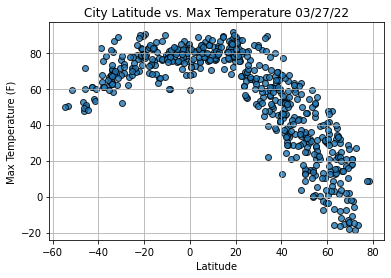

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

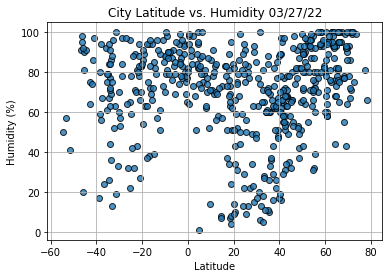

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

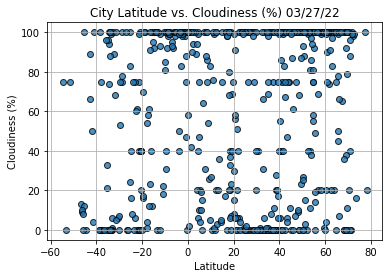

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

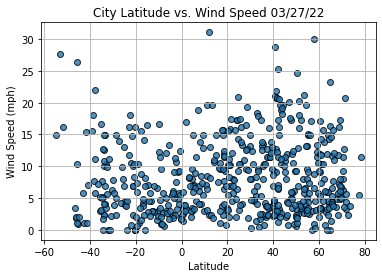

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dumas,US,2022-03-27 18:36:06,35.8656,-101.9732,60.94,33,0,10.36
1,Punta Arenas,CL,2022-03-27 18:36:06,-53.1500,-70.9167,50.11,57,0,27.63
2,Kodiak,US,2022-03-27 18:36:07,57.7900,-152.4072,33.31,93,100,29.93
3,Vardo,NO,2022-03-27 18:36:08,70.3705,31.1107,17.58,93,20,11.50
4,Broome,US,2022-03-27 18:36:09,42.2506,-75.8330,33.01,72,100,17.27
...,...,...,...,...,...,...,...,...,...
540,Naze,JP,2022-03-27 18:53:02,28.3667,129.4833,59.92,63,98,12.53
541,Caluquembe,AO,2022-03-27 18:53:02,-13.7833,14.6833,63.16,79,100,2.13
542,Alta Gracia,AR,2022-03-27 18:53:03,-31.6529,-64.4283,88.88,19,5,11.10
543,Opuwo,NA,2022-03-27 18:53:04,-18.0607,13.8400,72.72,37,4,3.40
